<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reihenentwicklung-(Taylor)" data-toc-modified-id="Reihenentwicklung-(Taylor)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reihenentwicklung (Taylor)</a></span><ul class="toc-item"><li><span><a href="#Taylorentwicklung-arctan" data-toc-modified-id="Taylorentwicklung-arctan-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Taylorentwicklung arctan</a></span></li><li><span><a href="#Weitere-Reihenentwicklungen" data-toc-modified-id="Weitere-Reihenentwicklungen-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Weitere Reihenentwicklungen</a></span></li></ul></li><li><span><a href="#Gradient,-Hessematrix" data-toc-modified-id="Gradient,-Hessematrix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gradient, Hessematrix</a></span><ul class="toc-item"><li><span><a href="#Extrema" data-toc-modified-id="Extrema-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Extrema</a></span></li><li><span><a href="#Tangente-an-Flächen" data-toc-modified-id="Tangente-an-Flächen-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tangente an Flächen</a></span></li><li><span><a href="#Gradient-als-Vektorfeld-(quiver)-Höhenlinien-(contour)" data-toc-modified-id="Gradient-als-Vektorfeld-(quiver)-Höhenlinien-(contour)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Gradient als Vektorfeld (quiver) Höhenlinien (contour)</a></span></li></ul></li><li><span><a href="#Polygone-(Farbe,-Marker,-Liniendicke)" data-toc-modified-id="Polygone-(Farbe,-Marker,-Liniendicke)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Polygone (Farbe, Marker, Liniendicke)</a></span></li><li><span><a href="#Code-in-anderen-Sprachen" data-toc-modified-id="Code-in-anderen-Sprachen-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Code in anderen Sprachen</a></span></li></ul></div>

# Lektion 11 
## Reihenentwicklung (Taylor)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#%matplotlib qt
init_printing()
x = symbols('x')

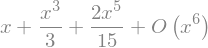

In [2]:
tr = tan(x).series(x, 0, 6)
tr 

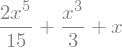

In [3]:
tr.removeO()

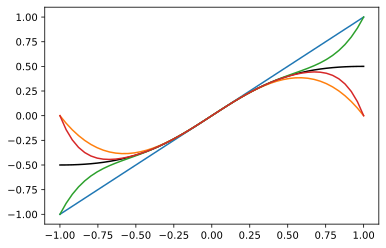

In [4]:
xn = np.linspace(-1, 1)
fig = plt.figure(1)
ax = fig.gca()
ax.plot(xn, xn/(1+xn**2), 'k')
rat = {}
for k in range(3, 10, 2):
    rat[k] = (x/(1+x**2)).series(x, 0, k).removeO()
    ax.plot(xn, lambdify(x, rat[k])(xn))
rat

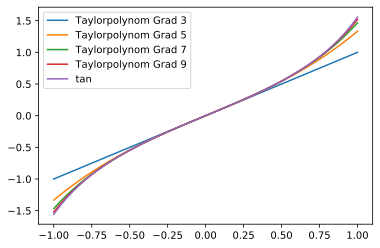

In [5]:
fig = plt.figure(2)
fig.clf() # clear figure
ax = fig.gca() # get current axes
xn = np.linspace(-1, 1)
for k in range(3, 10, 2):
    tp = tan(x).series(x, 0, k).removeO()
    ax.plot(xn, lambdify(x, tp)(xn), label='Taylorpolynom Grad {0}'.format(k))
    
ax.plot(xn, np.tan(xn), label='tan')
plt.legend()
plt.legend(loc=2);


### Taylorentwicklung arctan

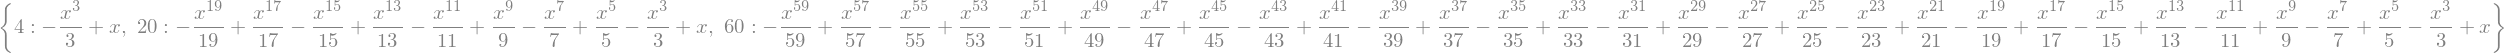

In [6]:
atan_d={}
for n in [4, 20, 60]:
    atan_d[n]= series(atan(x), x, 0, n).removeO()
atan_d

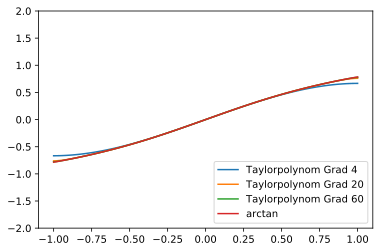

In [7]:
xn = np.linspace(-1, 1, 100)
fig = plt.figure(3)
fig.clf()
ax = fig.gca()
for tp in atan_d:
    ax.plot(xn,lambdify(x, atan_d[tp])(xn), \
            label='Taylorpolynom Grad {0}'.format(tp))
    
ax.plot(xn, np.arctan(xn), label='arctan')

ax.set_ylim(-2, 2)
plt.legend(loc=4);

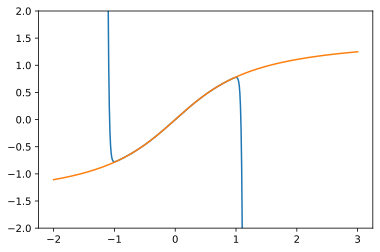

In [8]:
fig = plt.figure(5)
fig.clf()
ax = fig.gca()
xn = np.linspace(-2, 3, 1000)
ax.plot(xn, lambdify(x, atan_d[60])(xn), label="T60 0")
ax.plot(xn, np.arctan(xn), label='arctan')
ax.set_ylim(-2, 2)

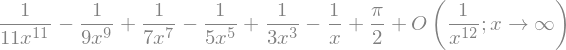

In [9]:
series(atan(x), x, oo, 12)

In [10]:
ai = series(atan(x), x, oo, 12).removeO()

No handles with labels found to put in legend.


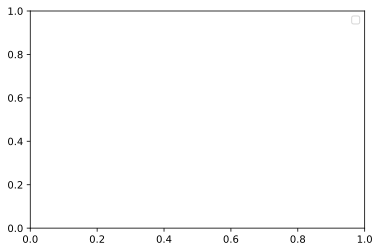

In [11]:
xn2 = np.linspace(1/2, 3, 500)
ax.plot(xn2, lambdify(x, ai)(xn2), label="T12 oo"); # das geht nicht im inline modus
plt.legend();

In [12]:
a1 = series(atan(x), x, 1, 12).removeO()
xn1 = np.linspace(-2, 3)
ax.plot(xn1,lambdify(x,a1)(xn1), label="T12 1");

### Weitere Reihenentwicklungen 

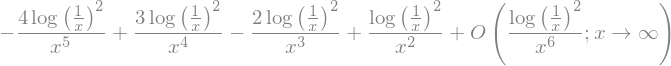

In [13]:
series(ln(x)**2/(1+x)**2, x, +oo)

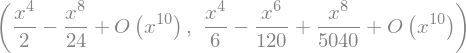

In [14]:
f = 1-cos(x**2) 
g = x*(x-sin(x))
f.series(x, 0, 10), g.series(x, 0, 10)

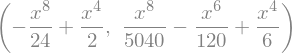

In [15]:
p = f.series(x, 0, 10).removeO()
q = g.series(x, 0, 10).removeO()
p,q

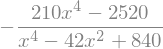

In [16]:
b = cancel(p/q)
b

In [17]:
b.subs(x, 0)

In [18]:
limit(f/g, x, 0)

## Gradient, Hessematrix

In [19]:
x, y, z = symbols('x y z')
var = [x, y, z]

In [20]:
f = exp(x**2+y**2+z**2)
f

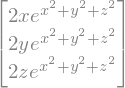

In [21]:
gr = Matrix([f.diff(t) for t in var])
gr

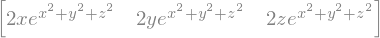

In [22]:
J = Matrix([f]).jacobian(var)
J

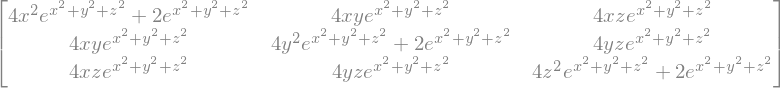

In [23]:
H = factor(gr.jacobian(var))
H

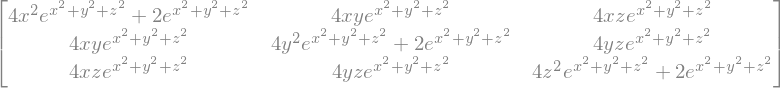

In [24]:
hessian(f,var)

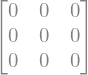

In [25]:
factor(hessian(f, var))-H

In [26]:
f = Function('f')
f(*var)

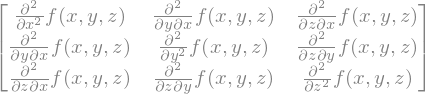

In [27]:
hessian(f(x, y, z), var)

In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
f = 1/2 * x**4  - x**2*y**2 - 1/2*y**4 + x**3 -2*x*y**2

In [30]:
fn = lambdify((x, y), f)

In [31]:
gn = np.linspace(-2, 2)
X, Y = np.meshgrid(gn ,gn)
F = fn(X, Y)

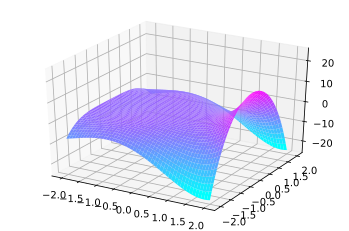

In [32]:
fig = plt.figure(6)
fig.clf()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, F, linewidth=0, cmap=plt.cm.cool);
ax.set_zlim(-25,25)

/local/schaedle/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'offset'
  This is separate from the ipykernel package so we can avoid doing imports until


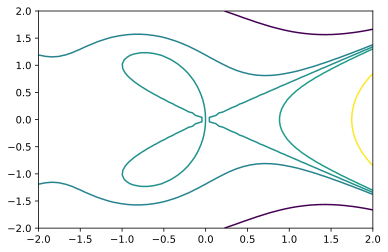

In [33]:
fig = plt.figure(6)
ax = fig.gca()
ax.contour(X, Y, F, np.array([-10, -1, 0, 1, 10]), offset=-25)

<a list of 8 text.Text objects>

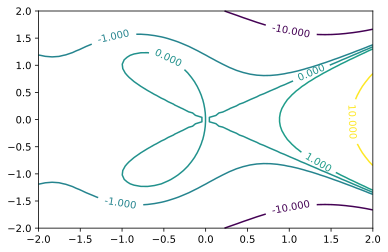

In [34]:
fig = plt.figure(7)
fig.clf()
ax = fig.gca()
cs = ax.contour(X, Y, F, np.array([-10, -1, 0, 1, 10]))
plt.clabel(cs)

In [35]:
ax.contour?

### Extrema

In [36]:
ext = solve({Eq(f.diff(y), 0), Eq(f.diff(x), 0)}) # Kandidaten fuer Extrema (grad(f) = 0)

In [37]:
ext

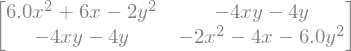

In [38]:
H = hessian(f, (x, y))
H

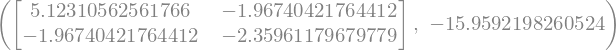

In [39]:
H0 = H.subs(ext[0])
H0, H0.det()

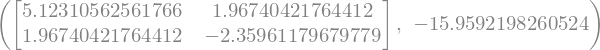

In [40]:
H1 = H.subs(ext[1])
H1, H1.det()

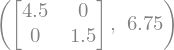

In [41]:
H2 = H.subs(ext[2])
H2, H2.det()

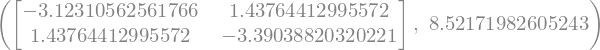

In [42]:
H3 = H.subs(ext[3])
H3, H3.det()

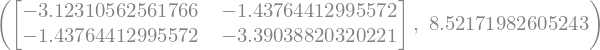

In [43]:
H4 = H.subs(ext[4])
H4, H4.det()

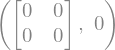

In [44]:
H5 = H.subs(ext[5])
H5, H5.det()

In [45]:
xv = []
yv = []
fv = []
for ex in ext:
    fw = f.subs(ex)
    print('x', ex[x].n(), 'y', ex[y].n(), 'f',fw.n())
    xv.append(ex[x].n())
    yv.append(ex[y].n())
    fv.append(fw.n())

x -1.64038820320221 y -0.768051397498532 f -0.619684349426759
x -1.64038820320221 y 0.768051397498532 f -0.619684349426759
x -1.50000000000000 y 0 f -0.843750000000000
x -0.609611796797792 y -0.920650341226544 f 0.201715599426759
x -0.609611796797792 y 0.920650341226544 f 0.201715599426759
x 0 y 0 f 0


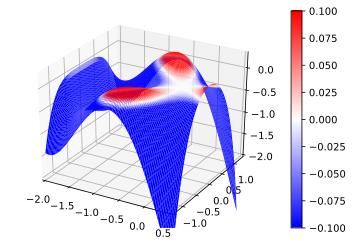

In [46]:

xn = np.linspace(-2, .5, 100)
yn = np.linspace(-1.3, 1.3, 100)
X, Y = np.meshgrid(xn, yn)
F = fn(X, Y)

from matplotlib.colors import Normalize
norm = Normalize(fv[5]-.1, fv[5]+.1)
#norm = Normalize(fv[5]-.1, fv[5]+.1)
#norm = Normalize(-.1, 0.1)

fig = plt.figure(81)
fig.clf()

ax = fig.add_subplot(111, projection='3d')
pl = ax.plot_surface(X, Y, F, linewidth=0, cmap=plt.cm.bwr, norm=norm, cstride=1, rstride=1)

ax.set_xlim(-2, .5)
ax.set_ylim(-1.3, 1.3)
ax.set_zlim(-2, .3)
fig.colorbar(pl)


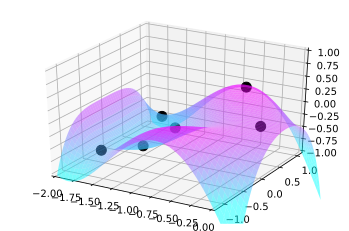

In [47]:
from matplotlib.colors import Normalize
norm = Normalize(-1, 0.2)
xn = np.linspace(-2, 0.3)
yn = np.linspace(-1.2, 1.2)
X, Y = np.meshgrid(xn, yn)
F = fn(X, Y)
fig = plt.figure(8)
fig.clf()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, F, linewidth=0, cmap=plt.cm.cool, norm=norm, alpha=0.5)
ax.plot3D(xv, yv, fv, 'ko', MarkerSize=10)
ax.set_ylim(-1.2, 1.1)
ax.set_xlim(-2, 0)
ax.set_zlim(-1, 1);

### Tangente an Flächen

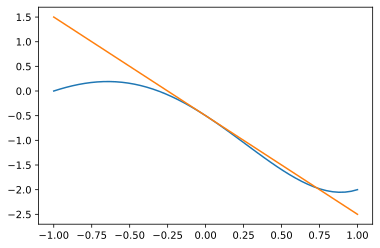

In [48]:
xt = np.linspace(-1,1)
fig2 = plt.figure(9)
ax2 = fig2.gca()
ax2.plot(xt,fn(xt,-1))
ax2.plot(xt,fn(0,-1)+f.diff(x).subs({x:0, y:-1})*xt)

In [49]:
tangent = lambda xt: fn(0, -1) + f.diff(x).subs({x:0, y:-1})*xt
ax.plot(xt,0*xt-1, tangent(xt));

In [50]:
ax.plot(xt, 0*xt-1, fn(xt, -1))

### Gradient als Vektorfeld (quiver) Höhenlinien (contour)

In [51]:
grad = Matrix([f]).jacobian([x, y])
gradn = lambdify((x, y), grad)
GR = gradn(X, Y)[0]
#GR

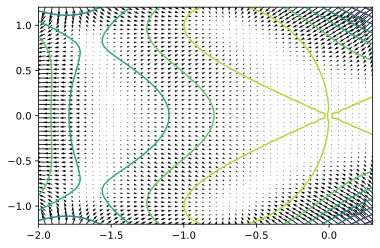

In [52]:
fig = plt.figure(10)
ax = fig.gca()
ax.contour(X, Y, F)
ax.quiver(X, Y, GR[0], GR[1], angles='xy')

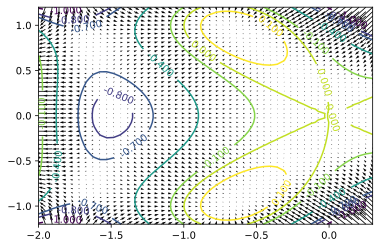

In [53]:
fig = plt.figure(11)
ax = fig.gca()
cs = ax.contour(X,Y,F,np.array([-1,-.8,-.7,-.4,-.1,0,.1]))
plt.clabel(cs)
ax.quiver(X,Y,GR[0],GR[1], angles='xy');

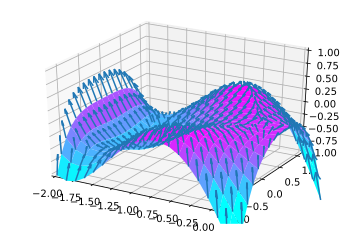

In [54]:
from matplotlib.colors import Normalize
norm = Normalize(-1, 0.2)
xn = np.linspace(-2, 0.3, 20)
yn = np.linspace(-1.2, 1.2, 20)
X,Y = np.meshgrid(xn, yn)
F = fn(X, Y)
fig = plt.figure(12)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, F, linewidth=0, cmap=plt.cm.cool, norm=norm)
ax.set_ylim(-1.2, 1.1)
ax.set_xlim(-2, 0)
ax.set_zlim(-1, 1)
GR = gradn(X, Y)[0]
nG = np.sqrt(GR[0, :, :]**2 + GR[1, :, :]**2)
ax.quiver(X, Y, F, GR[0,:,:]/nG, GR[1,:,:]/nG, np.sqrt(1+nG**2), length=0.1);

## Polygone (Farbe, Marker, Liniendicke)

In [55]:
dreieck = np.array([[0, 0], [1, 0], [0, 1], [0, 0]])

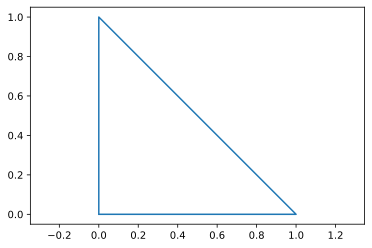

In [56]:
fig = plt.figure()
ax = fig.gca()
ax.plot(dreieck[:, 0], dreieck[:, 1])
ax.axis('equal')

In [57]:
def n_eck(n):
    x = [np.sin(2*np.pi*j/n) for j in range(n+1)]
    y = [np.cos(2*np.pi*j/n) for j in range(n+1)]
    return x, y

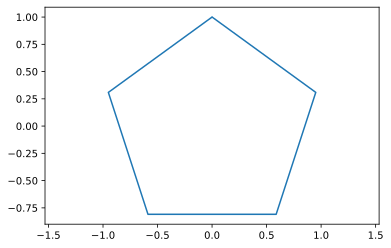

In [58]:
x,y  = n_eck(5)
fig = plt.figure()
ax = fig.gca()
ax.plot(x,y)
ax.axis('equal');

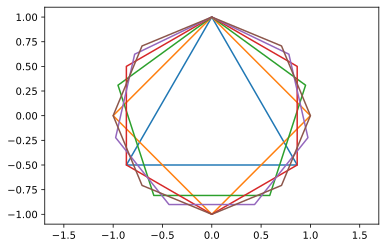

In [59]:
fig = plt.figure()
ax = fig.gca()
for n in range(3,9):
    ax.plot(*n_eck(n))
ax.axis('equal')

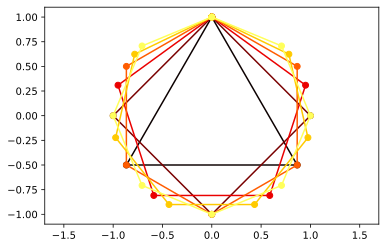

In [60]:
fig= plt.figure()
ax = fig.gca()
for n in range(3,9):
    x, y = n_eck(n)
    farbe = plt.cm.hot((n-3)/6)
    ax.plot(x, y , 'o-', color=farbe)
ax.axis('equal');

In [61]:
x = symbols('x')
f = 1/7*(-x)**(3/2)* ( (3/2)**(sqrt(-x))-floor((3/2)**(sqrt(-x))))

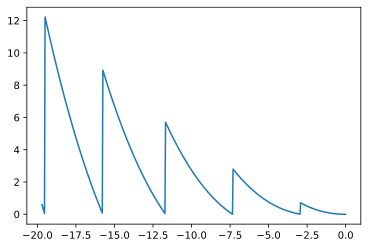

In [62]:
fn = lambdify(x,f)
xn = np.linspace(-19.7,0,500)
fig = plt.figure()
ax = fig.gca()
ax.plot(xn, fn(xn));

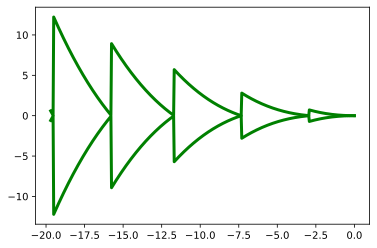

In [63]:
fig = plt.figure('X-mas tree')
ax = fig.gca()
ax.plot(xn, fn(xn), xn, -fn(xn), linewidth=3, color='green');

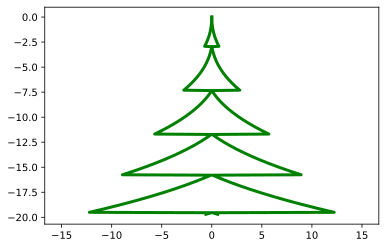

In [64]:
fig = plt.figure('Y-mas tree')
ax = fig.gca()
ax.plot(fn(xn),xn,-fn(xn),xn,linewidth=3,color='green');
ax.axis('equal');

In [65]:
ax.plot([-.5, .5, .5, -.5, -.5], \
        [-19.5, -19.5, -22, -22, -19.5], color='brown', linewidth='4');

In [66]:
def n_stern(n):
    x = [(0.5+ j % 2)*np.sin(np.pi*2*j/n) for j in range(2*n+1)]
    y = [(0.5+ j % 2)*np.cos(np.pi*2*j/n) for j in range(2*n+1)]
    return x ,y

In [67]:
x,y = n_stern(9)
ax.plot(x, y, color='gold', linewidth=2);

## Code in anderen Sprachen

In [68]:
x,y = symbols('x y')

In [69]:
f = log(x)*sqrt(x**2+y**2)

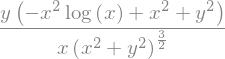

In [70]:
df = f.diff(x,y).simplify()
df

In [71]:
octave_code(df)  # Octave oder Matlabcode

'y.*(-x.^2.*log(x) + x.^2 + y.^2)./(x.*(x.^2 + y.^2).^(3/2))'

In [72]:
ccode(df)

'y*(-pow(x, 2)*log(x) + pow(x, 2) + pow(y, 2))/(x*pow(pow(x, 2) + pow(y, 2), 3.0/2.0))'

In [73]:
fcode(df)

'      y*(-x**2*log(x) + x**2 + y**2)/(x*(x**2 + y**2)**(3.0d0/2.0d0))'

In [74]:
print(latex(df))

\frac{y \left(- x^{2} \log{\left(x \right)} + x^{2} + y^{2}\right)}{x \left(x^{2} + y^{2}\right)^{\frac{3}{2}}}
